**FINANCIAL DERIVATIVES - 6B<br>
ASSIGNMENT # 4 (Portfolio Optimization)**

**ABDUL WASEY - 19P-0113<br>
MUHAMMAD JUNAID - 19P-0113**

In [7]:
#importing necessary libraries that will be required throughout the analysis.

import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib import style
pd.options.mode.chained_assignment = None

In [8]:
#setting the tickers(the stocks we are analysing) and gathering the data for 5 years.

start = dt.datetime(2016, 1, 1)
end = dt.datetime(2021, 12, 31)
tickers = ['DIS', 'SONY', 'WBD'] #(Disney , Sony , Warner Bros. Discovery)

In [9]:
returns = pd.DataFrame()
portfolio_return = []
annual_return = 0
portfolio_risk = []
portfolio_weights = []
weights = 0
rf = 0
sharpe_ratio = []

In [10]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer') 
returns

,DIS,SONY,WBD
Date,,,
2015-12-31,NaN,NaN,NaN
2016-01-04,-0.019985,0.004876,-0.010120
2016-01-05,-0.020198,0.029923,0.002272
2016-01-06,-0.005352,-0.072242,-0.007178
2016-01-07,-0.008569,-0.015235,-0.030441
...,...,...,...
2021-12-27,-0.005403,0.027047,-0.002457
2021-12-28,0.015707,0.002123,-0.001232
2021-12-29,-0.002126,-0.006197,-0.018907


In [12]:
#Deciding the number of portfolios.

number_of_portfolios = 50000

for portfolio in range(number_of_portfolios):
    
    #Random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 2)
    portfolio_weights.append(weights)
     
    #Annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252 #multiplying by 252 because these are the trading days
    portfolio_return.append(annualized_return)                 #in a year.
    
    #Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
   
    #Sharpe Ratio
    s_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(s_ratio)

In [13]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)

In [14]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]

In [15]:
portfolio_df = pd.DataFrame(portfolio_metrics)
portfolio_df = portfolio_df.T

In [16]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe Ratio', 'Weights']
portfolio_df

,Return,Risk,Sharpe Ratio,Weights
0,0.175055,0.237644,0.736628,"[0.33, 0.38, 0.29]"
1,0.213604,0.239742,0.890973,"[0.19, 0.56, 0.24]"
2,0.171001,0.26775,0.638658,"[0.1, 0.41, 0.49]"
3,0.238798,0.240284,0.993814,"[0.28, 0.64, 0.07]"
4,0.107624,0.279486,0.385076,"[0.37, 0.11, 0.52]"
...,...,...,...,...
99995,0.186884,0.23267,0.803216,"[0.36, 0.42, 0.22]"
99996,0.267356,0.270408,0.988713,"[0.01, 0.8, 0.2]"
99997,0.163185,0.234488,0.69592,"[0.45, 0.31, 0.24]"
99998,0.179772,0.276189,0.650902,"[0.02, 0.46, 0.52]"


In [19]:
minimum_risk_portfolio = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
maximum_return_portfolio = portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]
maximum_sharpe_portfolio = portfolio_df.iloc[portfolio_df['Sharpe Ratio'].astype(float).idxmax()]

In [24]:
print('Minimum Risk Portfolio: ')
display(min_risk_portfolio)
display(tickers)
print('  ')
print('  ')

print('Maximum Return Portfolio: ')
display(max_return_portfolio)
display(tickers)
print('  ')
print('  ')


print('Maximum Sharpe Ratio Portfolio: ')
display(max_sharpe_portfolio)
display(tickers)
print('  ')

Minimum Risk Portfolio: 


Return                   0.186765
Risk                     0.227159
Sharpe Ratio             0.822178
Weights         [0.47, 0.4, 0.12]
Name: 20254, dtype: object

['DIS', 'SONY', 'WBD']

  
  
Maximum Return Portfolio: 


Return                    0.316249
Risk                       0.29909
Sharpe Ratio              1.057373
Weights         [0.01, 0.99, 0.01]
Name: 91816, dtype: object

['DIS', 'SONY', 'WBD']

  
  
Maximum Sharpe Ratio Portfolio: 


Return                   0.305338
Risk                     0.288181
Sharpe Ratio             1.059538
Weights         [0.06, 0.94, 0.0]
Name: 76406, dtype: object

['DIS', 'SONY', 'WBD']

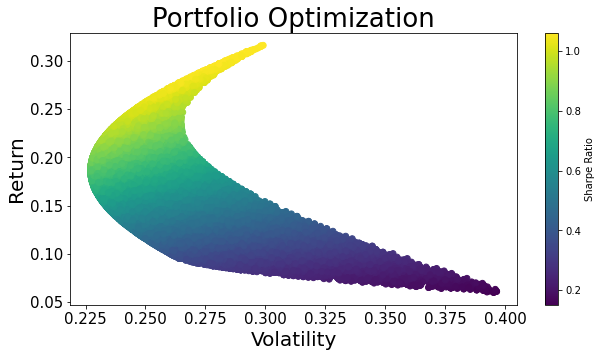

In [28]:
#Final Visualization

plt.figure(figsize = (10, 5))
color = np.array(["black", "green"])
plt.scatter(portfolio_risk, portfolio_return, c = portfolio_return / portfolio_risk) # c for colorbar based on sharpe ratio.

plt.title('Portfolio Optimization', fontsize = 26)

plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.colorbar(label = 'Sharpe Ratio')

plt.show()